In [1]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b7dcbcaa3c0384636100baaa4e780aae8192f2c059546be29bf0fc8e47611ed5
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="gHANp2vsdcbZgpkd2rcs")
project = rf.workspace("plate-detection-hhwwz").project("plate-text-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.


Extracting Dataset Version Zip to plate-text-detection-2 in yolov8:: 100%|██████████| 1403/1403 [00:01<00:00, 1269.28it/s]


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 9.3 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/plate-text-detection-2/data.yaml', epochs=150, imgsz=(640, 300))


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

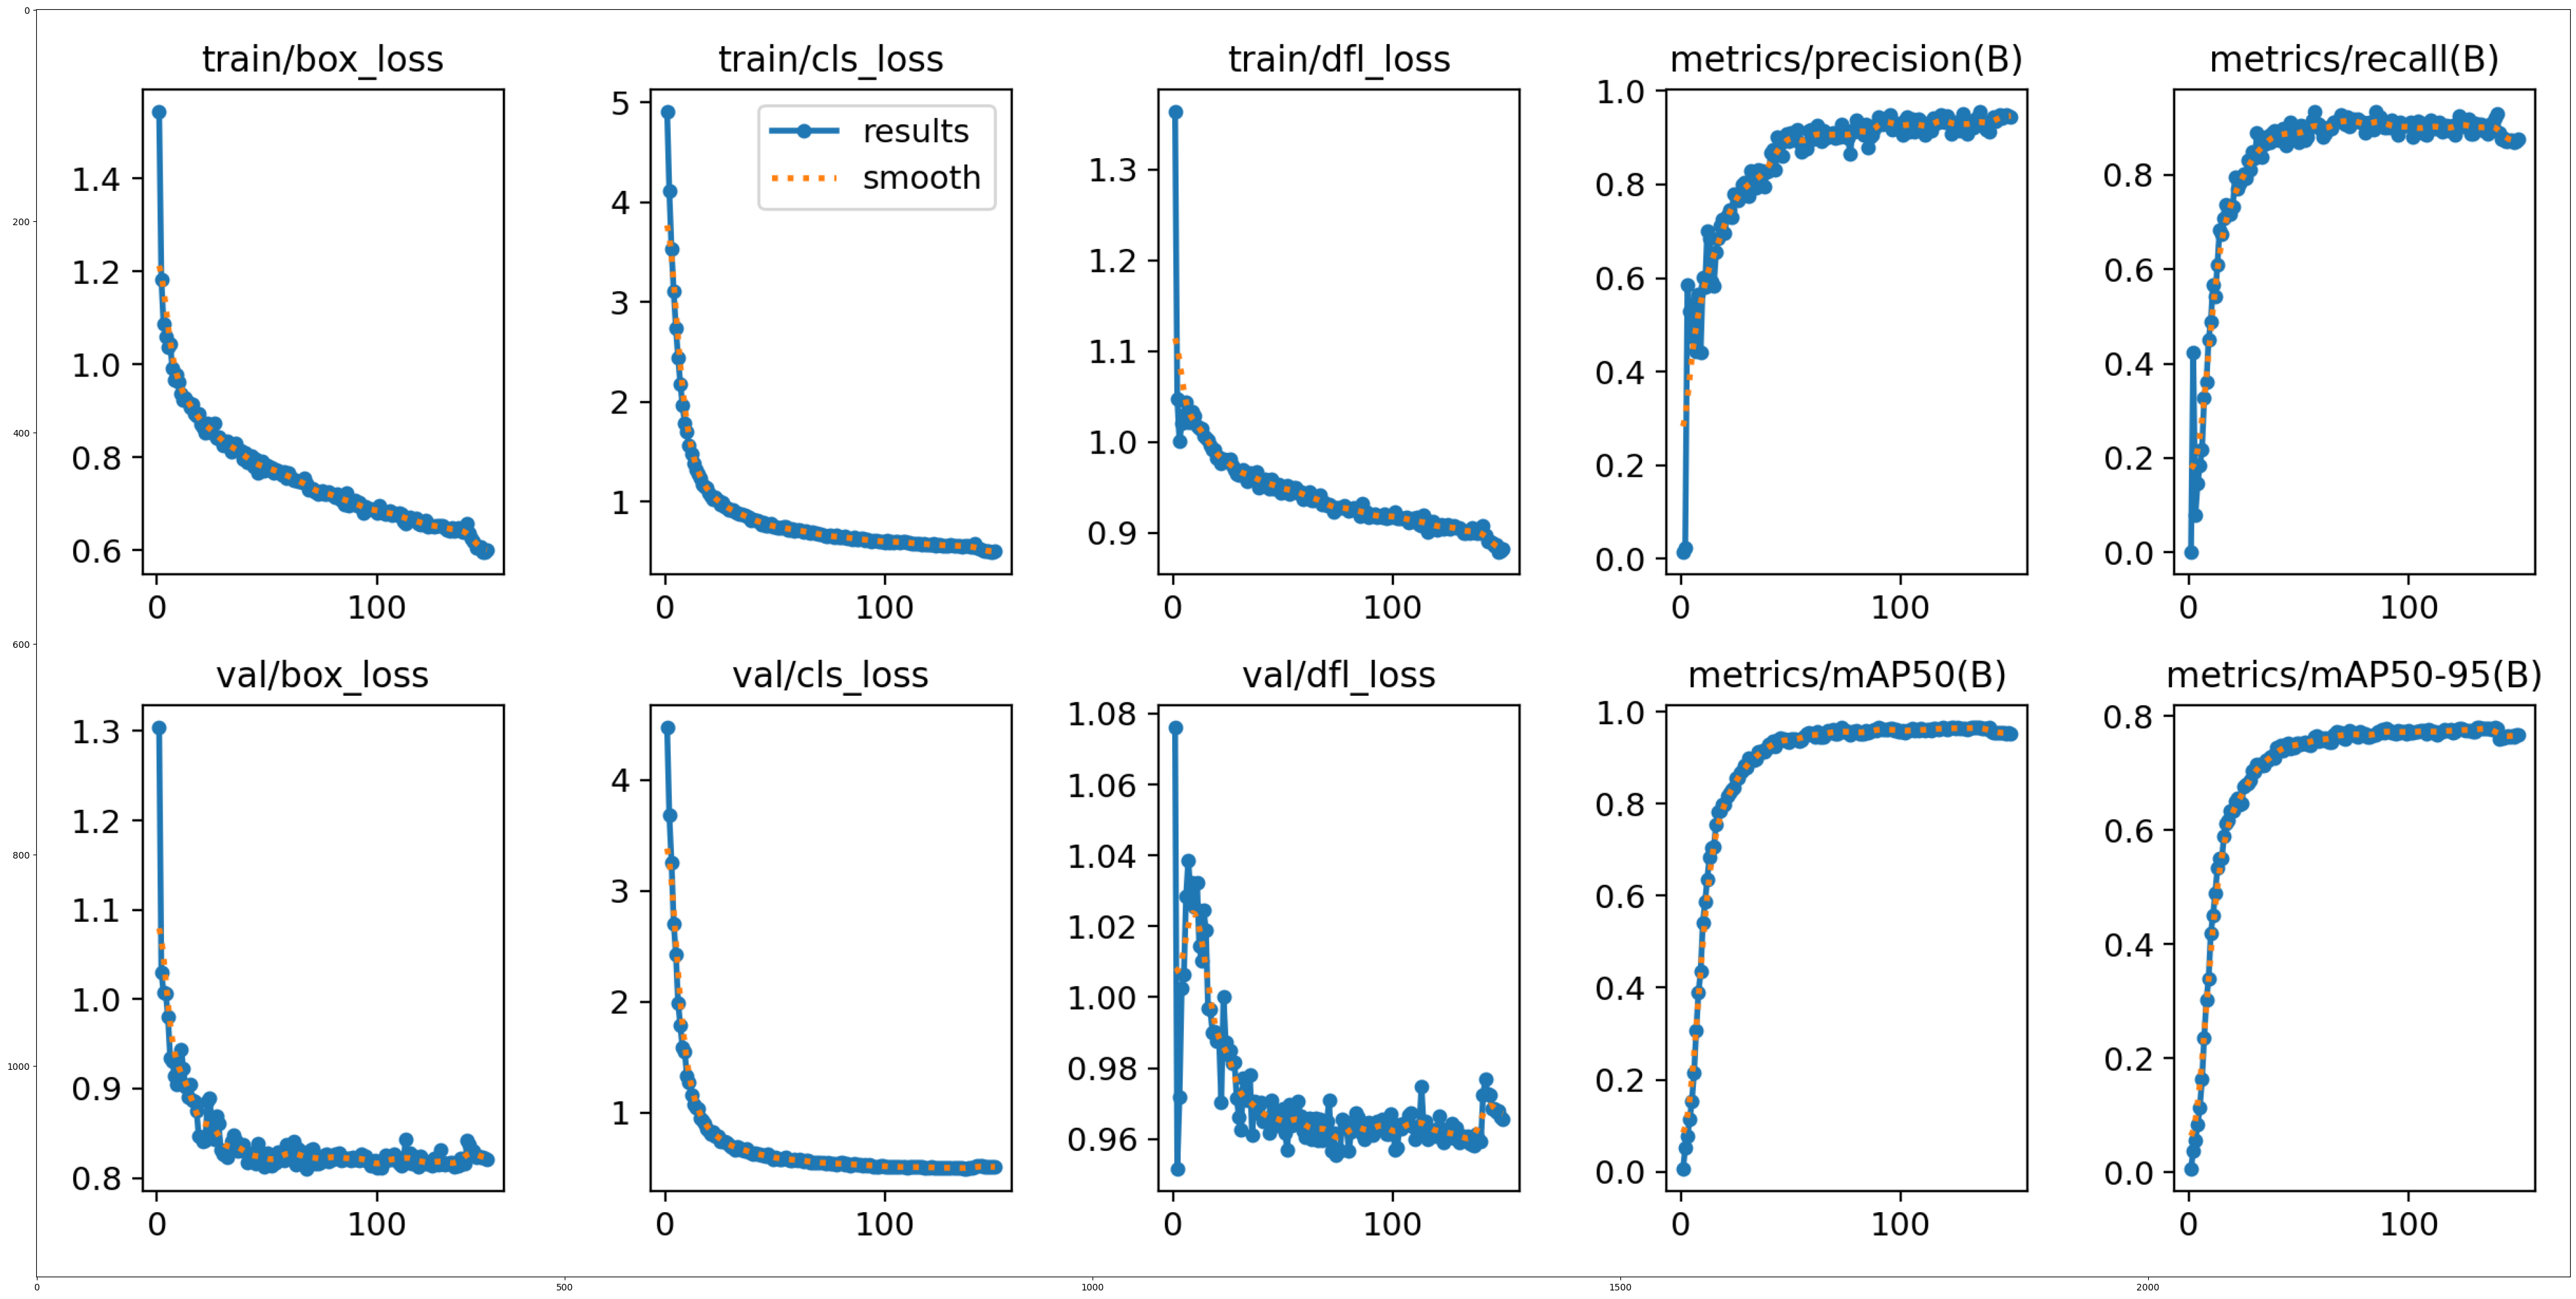

In [7]:
import matplotlib.pyplot as plt
result_plot = plt.imread("/content/runs/detect/train/results.png")
plt.figure(figsize=(50, 25))
plt.imshow(result_plot)
plt.show()

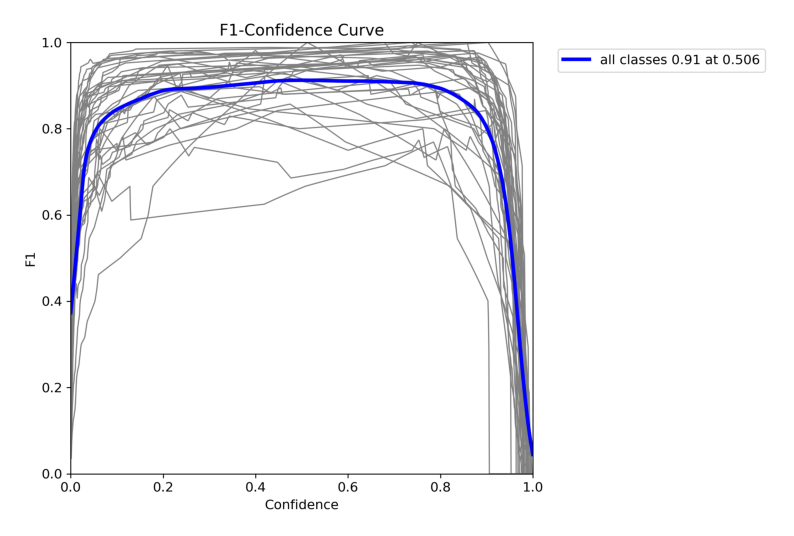

In [8]:
eval_list = ["/content/runs/detect/train/F1_curve.png", "/content/runs/detect/train/PR_curve.png", "/content/runs/detect/train/P_curve.png",
             "/content/runs/detect/train/R_curve.png", "/content/runs/detect/train/confusion_matrix.png",
             "/content/runs/detect/train/confusion_matrix_normalized.png"]

f1_curve = plt.imread(eval_list[0])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(f1_curve)

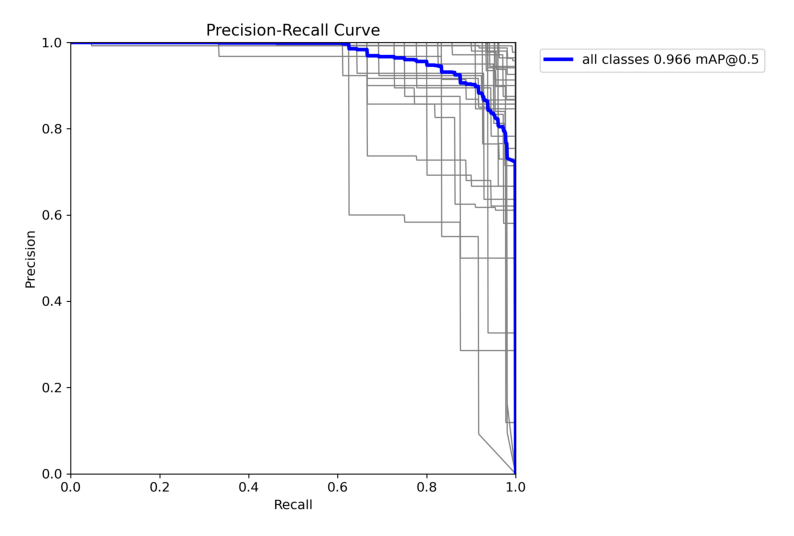

In [9]:
pr_curve = plt.imread(eval_list[1])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(pr_curve)

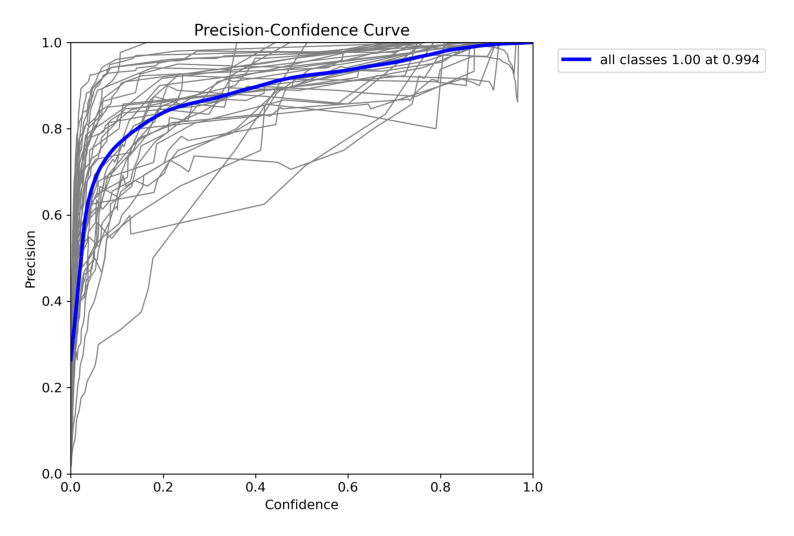

In [10]:
p_curve = plt.imread(eval_list[2])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(p_curve)

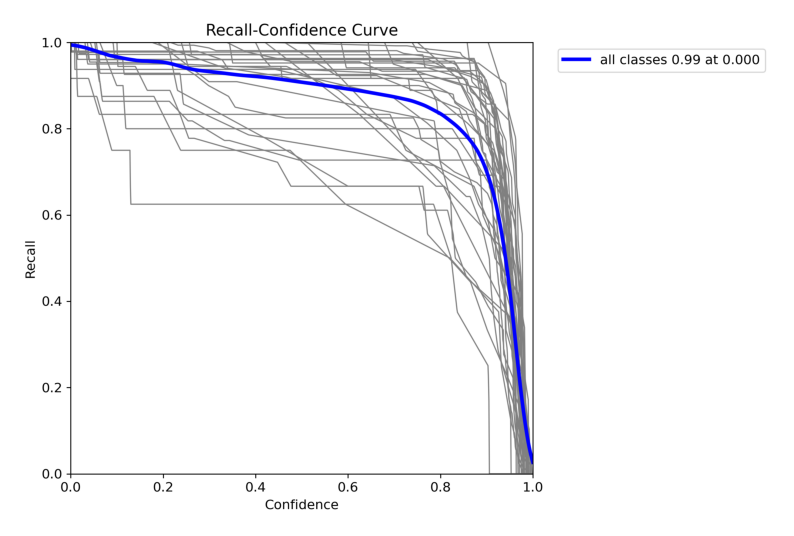

In [11]:
r_curve = plt.imread(eval_list[3])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(r_curve)

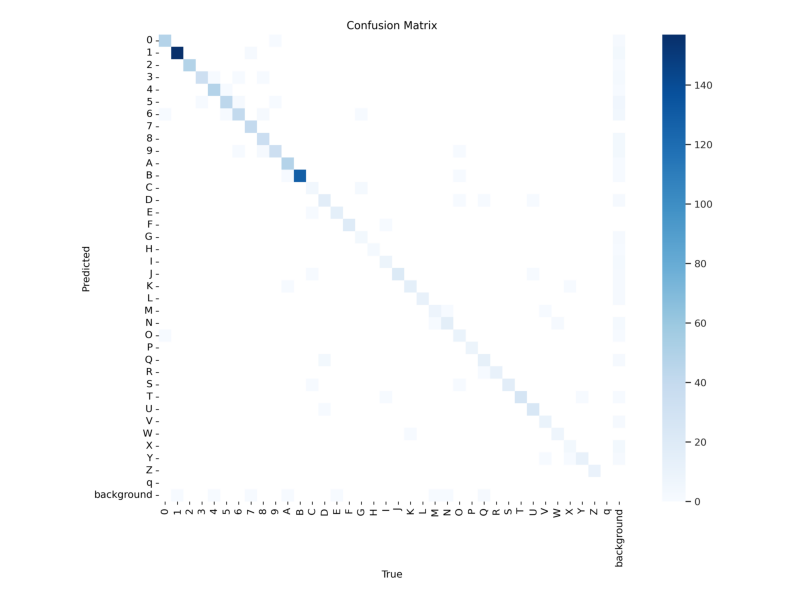

In [12]:
cm = plt.imread(eval_list[4])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cm)

# C sama G nya rada PR

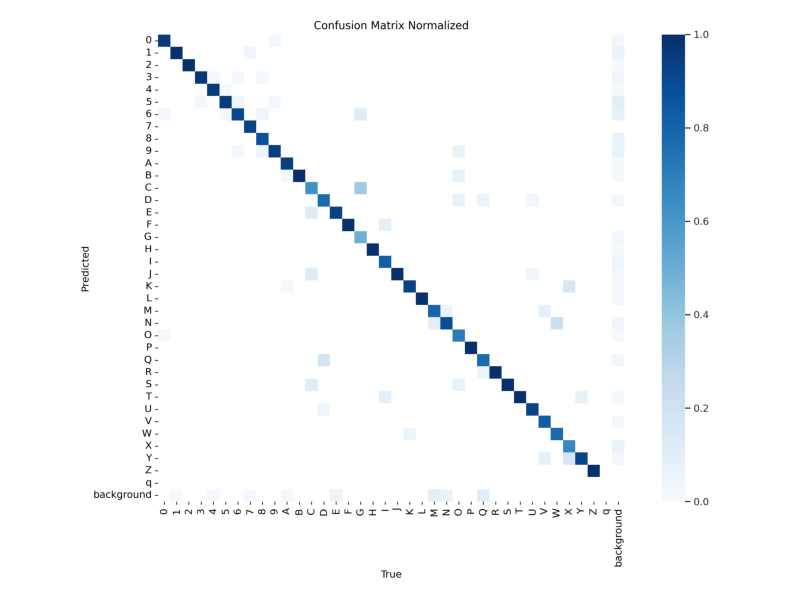

In [13]:
cm_n = plt.imread(eval_list[5])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cm_n)

In [14]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics YOLOv8.0.163 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3012863 parameters, 0 gradients
val: Scanning /content/plate-text-detection-2/valid/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.13s/it]
                   all        140       1072      0.922      0.908      0.966      0.778
                     0        140         50      0.939       0.96      0.972      0.792
                     1        140        158      0.974      0.981      0.991      0.709
                     2        140         49      0.974          1      0.995      0.824
                     3        140         35        0.9      0.971      0.989      0.821
                     4        140         50      0.979      0.911      0.992      0.801
                     5   

array([    0.79173,     0.70934,     0.82437,     0.82104,     0.80141,     0.75915,     0.80413,      0.7864,     0.78621,     0.78504,     0.72406,     0.78317,     0.70222,     0.76272,      0.7909,     0.81599,     0.77642,      0.8299,     0.75749,     0.81627,     0.77054,     0.71783,     0.83778,     0.76925,
           0.75547,      0.8245,     0.69684,     0.85889,     0.81408,     0.80522,     0.79739,     0.64342,     0.78202,     0.67425,     0.79525,     0.84922,     0.77833])

In [85]:
import cv2
def prediksi(image, model):
  image = cv2.resize(image, (640, 300))
  results = model.predict(image)
  for result in results:
    boxes = result.boxes.cpu().numpy() # get boxes on cpu in numpy
    for box in boxes: # iterate boxes
      r = box.xyxy[0].astype(int) # get corner points as int
      print(r) # print boxes
      cv2.rectangle(image, r[:2], r[2:], (0,200,0), 1) # draw boxes on image
      cls = result.names[int(box.cls[0])]
      cv2.putText(image, str(cls), (r[0] + 4, r[1] - 2), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 2)
  return plt.imshow(image)

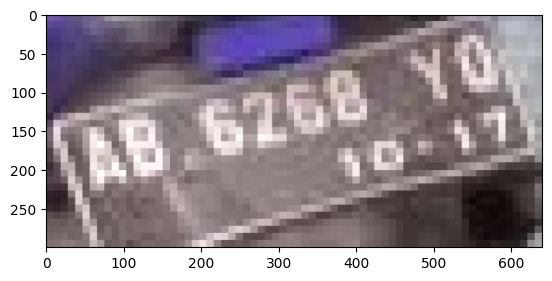

In [86]:
image_test = cv2.imread("/content/plate-text-detection-2/valid/images/DataTrain8_png.rf.daf2e4a6782792ff0f5c28fff32a6d6a.jpg")
plt.imshow(image_test)


0: 320x640 1 2, 1 5, 2 6s, 1 8, 1 A, 1 B, 1 Q, 1 Y, 20.8ms
Speed: 1.4ms preprocess, 20.8ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 640)


[ 93 128 160 213]
[199 106 257 186]
[ 52 141 105 228]
[253  96 312 179]
[307  84 363 159]
[360  68 420 144]
[522  22 591 103]
[466  40 525 114]
[307  81 363 159]


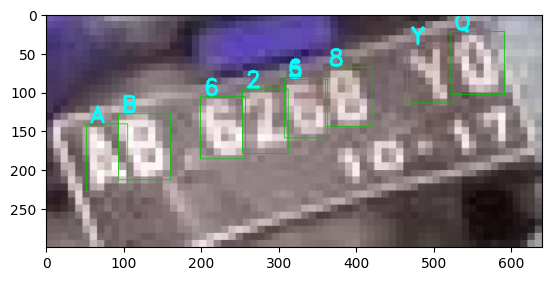

In [87]:
prediksi(image_test, model)


0: 320x640 2 1s, 1 6, 1 8, 1 A, 1 B, 1 N, 1 X, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)


[553  69 606 204]
[260  39 313 162]
[ 36  19  90 142]
[ 95  21 146 146]
[216  33 251 159]
[383  51 421 178]
[316  43 375 169]
[493  62 546 194]


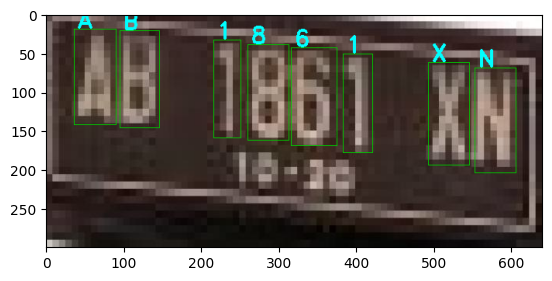

In [88]:
gambar = cv2.imread("/content/plate-text-detection-2/valid/images/DataTrain773_png.rf.b6abf6a735cb10221bfa467843c7cd01.jpg")
prediksi(gambar, model)


0: 320x640 1 0, 1 1, 1 4, 1 5, 1 9, 1 B, 1 F, 1 R, 1 S, 15.2ms
Speed: 1.3ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)


[508  24 560 159]
[212  74 273 193]
[561  22 615 150]
[173  83 206 210]
[448  41 505 164]
[334  59 391 177]
[ 50  96 105 227]
[277  69 332 187]
[278  71 332 187]


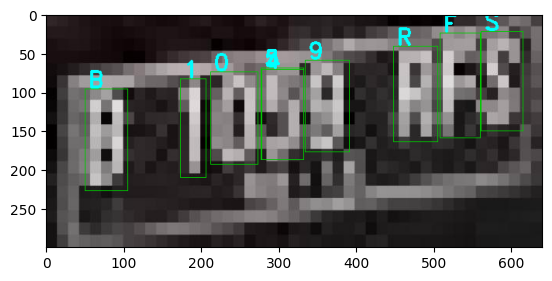

In [89]:
gmbr = cv2.imread("/content/plate-text-detection-2/valid/images/DataTrain584_png.rf.b2e3929839b98a07403e0278828d8d4e.jpg")
prediksi(gmbr, model)


0: 320x640 1 0, 1 3, 1 4, 1 7, 1 A, 1 D, 1 E, 1 O, 10.9ms
Speed: 1.3ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 640)


[475  83 513 191]
[128 106 164 213]
[326  97 362 197]
[290  97 324 198]
[253  98 288 202]
[433  88 472 192]
[363  93 400 196]
[166 102 202 207]


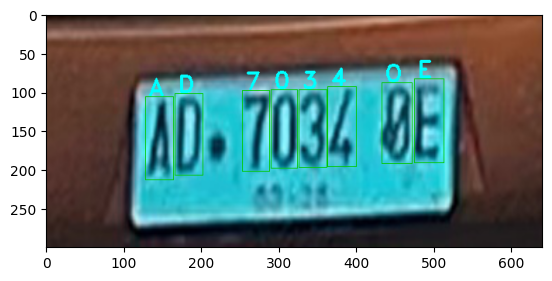

In [90]:
test1 = cv2.imread("/content/Test-Data/DataTest1.png")
prediksi(test1, model)


0: 320x640 1 3, 2 8s, 1 9, 1 A, 1 E, 1 X, 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 2.7ms postprocess per image at shape (1, 3, 320, 640)


[382  96 413 196]
[347  97 380 200]
[278 104 315 206]
[181 116 217 218]
[315 100 346 199]
[499  86 535 188]
[462  86 501 192]


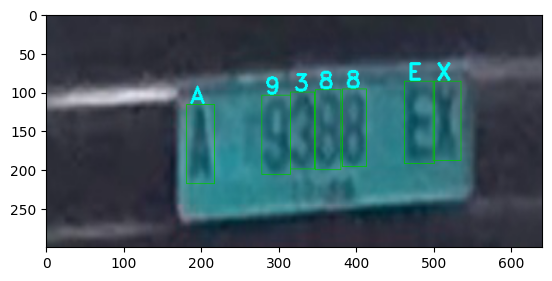

In [91]:
test16 = cv2.imread("/content/Test-Data/DataTest2.png")
prediksi(test16, model)


0: 320x640 1 1, 1 4, 1 8, 1 A, 1 D, 1 U, 10.3ms
Speed: 4.2ms preprocess, 10.3ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 640)


[539  53 607 191]
[238  41 312 179]
[ 43  37 113 174]
[142  37 217 177]
[440  50 510 185]
[373  47 415 183]


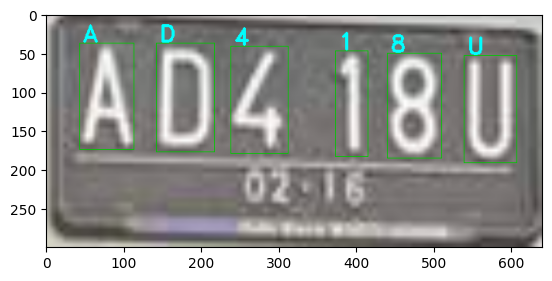

In [92]:
test62 = cv2.imread("/content/Test-Data/DataTest62.png")
prediksi(test62, model)


0: 320x640 1 0, 1 1, 1 2, 1 8, 1 B, 1 L, 1 U, 49.5ms
Speed: 12.3ms preprocess, 49.5ms inference, 16.2ms postprocess per image at shape (1, 3, 320, 640)


[191  92 220 202]
[169  86 186 197]
[220  93 251 209]
[ 86  74 122 190]
[251  99 282 210]
[336 111 362 225]
[362 115 395 233]


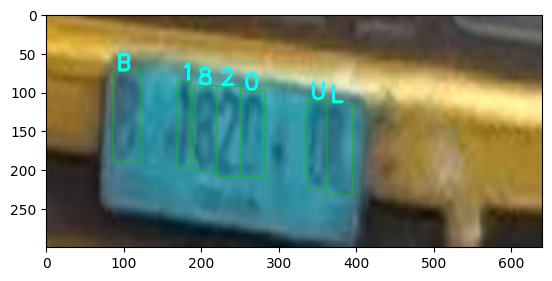

In [95]:
test59 = cv2.imread("/content/Test-Data/DataTest59.png")
prediksi(test59, model)